# **PART A**

In [2]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#Import file
df = pd.read_csv('Birthweight_reduced.csv')

In [ ]:
#Explore first 5 rows of the dataframe
df.head(n=5)

In [ ]:
# Gives number of rows : 42
count_row = df.shape[0]  
count_row

In [ ]:
# Gives number of columns : 17
count_col = df.shape[1]  
count_col

In [ ]:
#Columns in this df
print(df.columns.values)

# Pairplots using seaborn

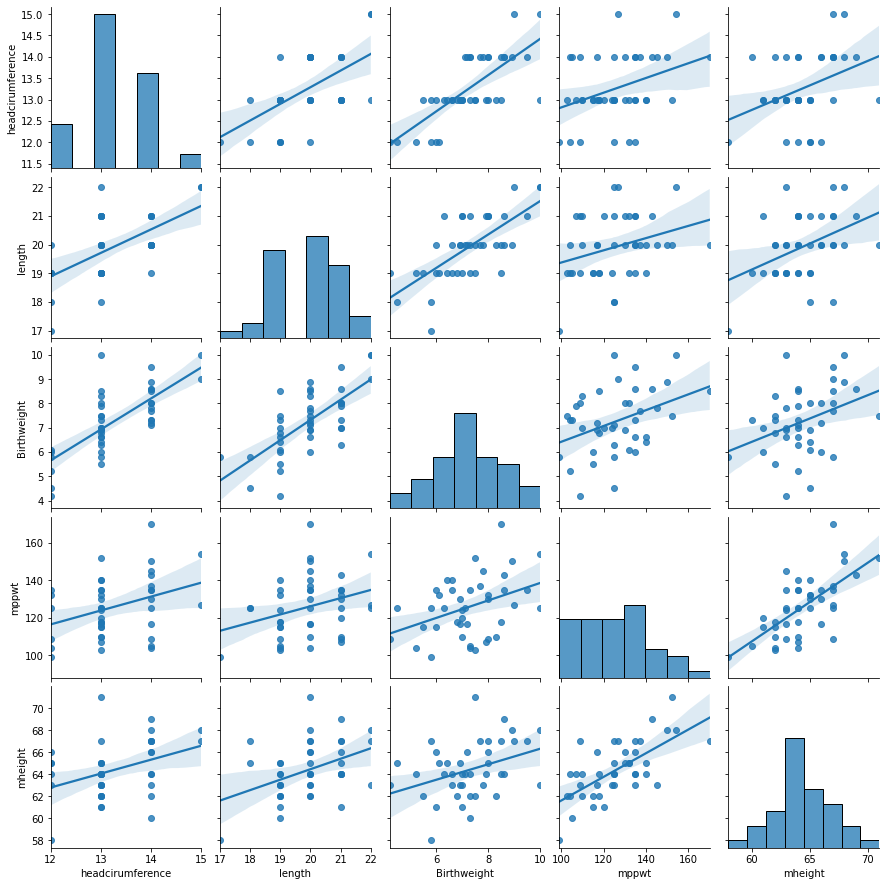

In [7]:
p = sns.pairplot(df, vars=['headcirumference','length','Birthweight','mppwt','mheight'],kind='reg')

### Pairplot interpretation 

Some of them appeared to have linear relationship between variables. Some don't have relationships with the others

1. headcirumference has positive, weak, linear relationship with Birthweight
2. length has a positive relationship with Birthweight
3. mppwt has a positive linear relationship with mheight


**Correlations**

In [146]:
# Correlations values between 'headcirumference','length','Birthweight','mppwt','mheight'
df_corr=df[['headcirumference','length','Birthweight','mppwt','mheight']].corr().loc[['headcirumference','length','Birthweight','mppwt','mheight']]
df_corr

,headcirumference,length,Birthweight,mppwt,mheight
headcirumference,1.000000,0.565328,0.736396,0.357594,0.381293
length,0.565328,1.000000,0.697008,0.304394,0.414731
Birthweight,0.736396,0.697008,1.000000,0.389581,0.367947
mppwt,0.357594,0.304394,0.389581,1.000000,0.671247
mheight,0.381293,0.414731,0.367947,0.671247,1.000000


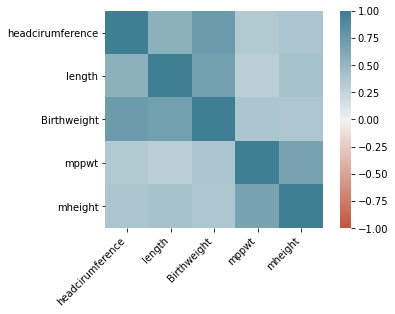

In [147]:
# Correlation matrix heatmap
ax = sns.heatmap(df_corr, 
                 vmin=-1, 
                 vmax=1, 
                 center=0,
                 cmap=sns.diverging_palette(20, 220, n=200), 
                 square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

***Interprete correlation results***

* 'headcirumference' has postive relationship with 'length', 'Birthweight', 'mppwt', and 'height'. Besides, 'headcirumference' has stronger postive relationship with 'Birthweight' (0.736) and moderate relationship with 'length' (0.565328)

* 'length' has a moderate positive relationship with 'headcirumference', strong positive relationship with 'Birthweight' and weaker realtionships with 'mppwt'and 'mheight'

* 'Birthweight' has a strong postive relationship with 'headcirumference' (0.736) and 'length' (0.697). Besides, it has weaker postive relationships with 'mppwt' and 'mheight'

* 'mppwt' has strong and postive relationship with 'mheight' (0.671) and weaker postive relationships with 'headcirumference','length' and 'Birthweight'

* 'mheight' has postive relationship with 'mppwt' and weaker relationships with 'headcirumference','length','Birthweight'

# Research question 1 
Configure the attribute "mppwt" as predictor(independent) variable and "Birthweight" outcome (dependent) variable.

In [ ]:
# Independent variable 'mppwt'
x1 = df['mppwt'].values.reshape(-1,1)
print(x1)

In [135]:
# Dependent variable 'Birthweight'
y1 = df['Birthweight'].values
print(y1)

[ 5.8  4.2  6.4  4.5  5.8  6.8  5.2  6.1  7.5  8.   8.6  7.1  6.6  7.
  6.6  6.3  7.3  8.5  5.5  7.5  6.   8.3  9.5  6.9  7.2  7.7  7.9  7.3
  8.   6.   9.   7.   7.3  7.8  7.   6.9 10.   8.6  8.  10.   8.5  8.9]


In [136]:
# Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [137]:
# Testing set 20%
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.2, random_state = 1)

**Training the Simple Regression Model**

In [138]:
lm = LinearRegression()
lm.fit(x_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predicting Test set result**


In [139]:
y_pred1 = lm.predict(x_test1)
y_pred1

array([7.38, 8.02, 7.6 , 7.38, 9.29, 7.81, 8.53, 7.04, 7.17])

In [140]:
x_pred1 = lm.predict(x_train1)
x_pred1

array([7.81, 6.75, 8.23, 6.53, 6.75, 7.47, 7.81, 7.68, 7.38, 7.81, 7.81,
       8.45, 7.04, 6.62, 8.62, 6.96, 6.96, 7.89, 6.49, 7.6 , 7.34, 7.68,
       7.09, 6.7 , 6.49, 6.28, 7.38, 7.09, 7.38, 6.7 , 6.45, 8.02, 8.15])

**Visualizing the Training set result**

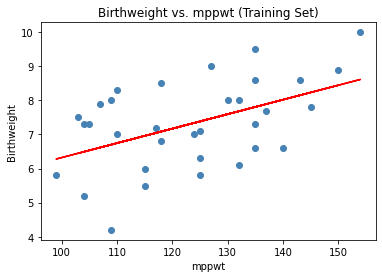

In [141]:
#Scatter plot
plt.scatter(x_train1, y_train1, color='steelblue')
# Drawing a line for prediction and result
plt.plot(x_train1, x_pred1, color = 'red')
plt.title('Birthweight vs. mppwt (Training Set)')
plt.xlabel('mppwt')
plt.ylabel('Birthweight')
plt.show()

**Visualizing the Test set result**

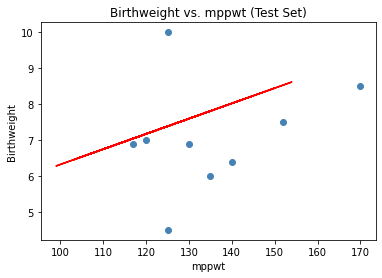

In [143]:
#Scatter plot
plt.scatter(x_test1, y_test1, color='steelblue')
# Drawing a line for prediction and result
plt.plot(x_train1, x_pred1, color = 'red')
plt.title('Birthweight vs. mppwt (Test Set)')
plt.xlabel('mppwt')
plt.ylabel('Birthweight')
plt.show()

In [68]:
lm.intercept_

2.07442059205579

In [69]:
lm.coef_

array([0.04247154])

***Intercept and Coefficient values interpretation***

Mother pre-pregnancy ('mppwt') and Weight of baby ('Birthweight') have a positive linear relationship

* Intercept value of Mother pre-pregnancy and Weight of baby is 2.074. 
Meaning that, the expected mean value of Weight of baby is 2.074 when Mother pre-pregnancy value equals to 0. However, this intercept has no intrinsic meaning since Mother pre-pregnancy weight never equals 0.
* For every lbs increase in Mother pre-pregnancy weight, the Weight of baby will increase by 0.0425 lbs.

# Research question 2 
Configure the attribute "mheight" as predictor(independent) variable and "Length" outcome (dependent) variable.

In [ ]:
# Independent variable 'mppwt'
x2 = df['mheight'].values.reshape(-1,1)
print(x2)

In [ ]:
# Dependent variable 'Birthweight'
y2 = df['length'].values
print(y2)

In [66]:
# Testing set 20%
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2, random_state = 1)

**Training the Simple Regression Model**

In [81]:
lm2 = LinearRegression()

In [ ]:
lm2.fit(x_train2, y_train2)

**Predicting Test set result**


In [ ]:
y_pred2 = lm2.predict(x_test2)
y_pred2

In [ ]:
x_pred2 = lm2.predict(x_train2)
x_pred2

**Visualizing the Training set result**

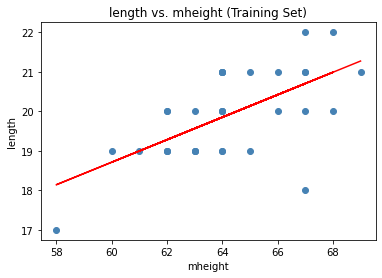

In [76]:
#Scatter plot
plt.scatter(x_train2, y_train2, color='steelblue')
# Drawing a line for prediction and result
plt.plot(x_train2, x_pred2, color = 'red')
plt.title('length vs. mheight (Training Set)')
plt.xlabel('mheight')
plt.ylabel('length')
plt.show()

**Visualizing the Test set result**

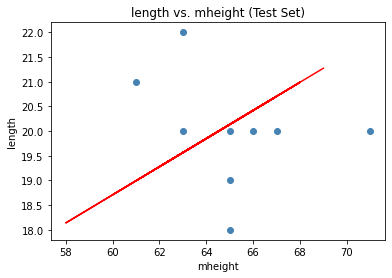

In [80]:
#Scatter plot
plt.scatter(x_test2, y_test2, color='steelblue')
# Drawing a line for prediction and result
plt.plot(x_train2, x_pred2, color = 'red')
plt.title('length vs. mheight (Test Set)')
plt.xlabel('mheight')
plt.ylabel('length')
plt.show()

In [85]:
lm2.intercept_

1.636701797892119

In [86]:
lm2.coef_

array([0.28456293])

***Intercept and Coefficient values interpretation***

* Intercept value of 'mheight'(x) and 'length' (y) is 1.636. 
Meaning that, the expected mean value of Length of baby is 1.636 inches when Mothers height value = 0 inches. However, this intercept has no intrinsic meaning since Mother height never equals 0.

* For every one inches increase in Mother height, Length of baby will increase by 0.284

# **PART B**

# Research question

In [ ]:
# Drop the features 'id','LowBirthWeight','lowbwt'
df.drop(['id','LowBirthWeight','lowbwt'], axis=1, inplace=True)
df

In [ ]:
df.head()

In [ ]:
# Setup x matrix with all the independent variables left and target of prediction is "Birthweight" which goes to y matrix
x3 = df[['headcirumference','length','Gestation','smoker','motherage','mnocig','mheight','mppwt','fage','fedyrs','fnocig','fheight','mage35']].values.reshape(-13,13)
print(x3)

In [110]:
y3 = df['Birthweight'].values
print(y3)

[ 5.8  4.2  6.4  4.5  5.8  6.8  5.2  6.1  7.5  8.   8.6  7.1  6.6  7.
  6.6  6.3  7.3  8.5  5.5  7.5  6.   8.3  9.5  6.9  7.2  7.7  7.9  7.3
  8.   6.   9.   7.   7.3  7.8  7.   6.9 10.   8.6  8.  10.   8.5  8.9]


In [111]:
#Split dataset into training and testing with a split ratio of 75:25
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size = 0.25, random_state = 1)

In [112]:
#Create and fit model
lm3=LinearRegression()
lm3.fit(x_train3, y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
# This model has intercept value of -12.339
lm3.intercept_

-12.339669419538508

In [113]:
lm3.coef_

array([ 0.590136  ,  0.03000425,  0.21330839, -0.14330002,  0.08514757,
       -0.01000675,  0.10939804, -0.00088544, -0.03010554,  0.04135972,
        0.00392469, -0.08227971, -0.80309893])

**Interpreting intercept and coefficient results**

* The intercept has a negative value -12.34. The expected values on Birthweight is -12.339 if all of the independent variables are 0.

* In the coefficient result, the most stand out value is -0.803 from Mother over 35 variable. This indicates that if Mother over 35 there will be a negative impact or decrease in Weight of baby. 

**Predicting Test set result**


In [115]:
y_pred3 = lm3.predict(x_test3)
y_pred3

array([6.19085843, 6.51990865, 7.94441211, 7.9610642 , 8.07563886,
       6.81230756, 7.58412913, 7.43522651, 7.06333491, 7.91277059,
       7.32680517])

In [116]:
x_pred3 = lm3.predict(x_train3)
x_pred3

array([7.66742507, 7.58123435, 7.31981889, 9.13257493, 7.92342745,
       7.57631379, 5.76007837, 7.29934065, 7.94816299, 8.72280253,
       8.16170723, 7.06469614, 9.37344265, 6.30902316, 6.12886797,
       7.85007642, 5.54587914, 7.54392268, 6.6776417 , 5.65569179,
       8.22316377, 4.74337976, 7.3775154 , 5.0407324 , 6.43101425,
       6.58365961, 7.84233091, 7.83279344, 6.55946288, 7.07814276,
       8.64567692])

In [117]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test3.reshape(len(y_test3),1)),1))

[[ 6.19  4.5 ]
 [ 6.52  6.4 ]
 [ 7.94  6.9 ]
 [ 7.96 10.  ]
 [ 8.08  8.5 ]
 [ 6.81  6.  ]
 [ 7.58  7.5 ]
 [ 7.44  6.9 ]
 [ 7.06  7.  ]
 [ 7.91  9.5 ]
 [ 7.33  8.3 ]]


**Interpreting the result**

Based on the result we can see the prediction and the actual values not too much different from each other.

**Visualizing the Test set results**

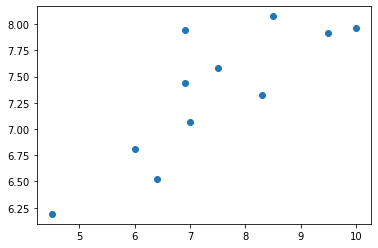

In [153]:
#Scatter plot
plt.scatter(y_test3, y_pred3)



In [120]:
from sklearn import metrics

In [149]:
# MAE = 0.852
MAE = metrics.mean_absolute_error(y_test3, y_pred3)
MAE

0.8521725894544105

In [150]:
# MSE = 1.1568
MSE = metrics.mean_squared_error(y_test3, y_pred3)
MSE

1.156847630230715

In [151]:
# RMSE = 1.0755
RMSE = np.sqrt(metrics.mean_squared_error(y_test3, y_pred3))
RMSE

1.075568514893735

**Conclusion of Multiple regression analysis**

Based on the result of prediction with actual real values above, we can see the prediction and the actual values not too much different from each other.

Mean absolute error (MAE) value is 0.85 implies that, on average, the predicting distance from the true value is 0.85, this value is closer to 0 meaning the model is a good predictor of the outputs.

Root Mean Square Error (RMSE) is measure of how spread out the residuals are, which the result is 1.075

The mean squared error ( MSE) shows how close a regression line is to set of points. It does this by taking the distances from the points to the regression line and squaring them. MSE has the value of 1.156

The MAE, RMSE, and MSE results indicate that the model above is a moderate prediction model.

